In [35]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[*********************100%***********************]  1 of 1 completed


0.04685378380107965
1.177809619412867


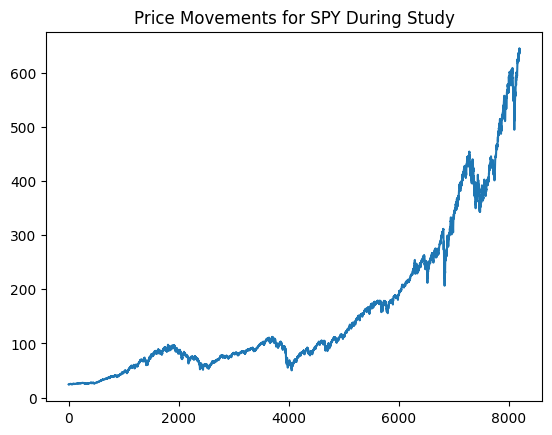

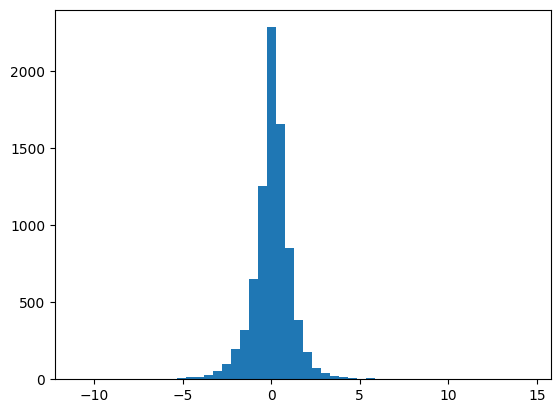

In [36]:
TICKER = 'SPY'
INTERVAL = '1d'
PERIOD = '730d' if INTERVAL == '1h' else 'max'

LOOKBACK = 10000

def get_data(ticker=TICKER, lookback=LOOKBACK, interval=INTERVAL):
    df = yf.download(ticker, interval=interval, auto_adjust=True, period=PERIOD)
    df.columns = df.columns.get_level_values(0)
    df = df.reset_index(drop=True)

    for c in df.columns:
        df[f'{c}_Change'] = df[c].pct_change() * 100

    # only return the subset of data you are interested in
    subset = df.iloc[-lookback:, :]
    plt.figure()
    plt.plot(subset['Close'])
    plt.title(f'Price Movements for {ticker} During Study')

    plt.figure()
    plt.hist(df['Close_Change'], bins=50)

    return subset.dropna()

def add_big_price_movement(df):

    close_change_avg = df['Close_Change'].mean()
    close_change_std = df['Close_Change'].std()
    print(close_change_avg)
    print(close_change_std)

    df['Big_Movement'] = np.where(df['Close_Change'] > close_change_avg + (close_change_std * 2), 1, 
                                  np.where(df['Close_Change'] < close_change_avg - (close_change_std * 2), -1, 0))

    return df

def main():
    df = get_data()
    df = add_big_price_movement(df)
    return df

df = main()

In [37]:
df['Big_Movement'].value_counts()

Big_Movement
 0    7802
-1     229
 1     167
Name: count, dtype: int64

In [46]:
df['Day_After'] = df['Big_Movement'].shift(1)
large_pos_shifts = df.loc[df['Day_After'] == 1]
large_pos_shifts['Close_Change'].mean()

np.float64(-0.24760406515041083)

In [45]:
df['Day_After'] = df['Big_Movement'].shift(1)
large_neg_shifts = df.loc[df['Day_After'] == -1]
large_neg_shifts['Close_Change'].mean()

np.float64(0.4004379998631678)